In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

<ipython-input-41-a29f16f80d0e>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/creditcard.csv')


In [ ]:
print("Shape of the Dataset: ", df.shape) # number of rows and columns in our dataset
print("\n\n", df.columns) # columns/features in our Dataset

Shape of the Dataset:  (162559, 31)


 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162554,113471.0,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.00,0.0
162555,113471.0,2.027248,-0.123314,-3.187138,-0.603106,2.685489,3.011201,-0.370792,0.722885,0.439019,...,0.198270,0.607648,0.011628,0.637274,0.286212,-0.081426,0.014987,-0.036266,12.14,0.0
162556,113471.0,-0.904898,1.131663,2.877922,4.645120,-0.684800,2.522137,-1.218386,1.178994,-0.383132,...,0.039884,0.559305,-0.438575,-0.960073,0.329436,0.739082,0.314542,0.086706,12.91,0.0
162557,113472.0,1.997105,0.449015,-2.478946,1.430360,1.144331,-0.773339,0.717322,-0.334020,0.109623,...,-0.039439,0.042502,-0.056210,0.297646,0.518700,-0.507040,-0.005483,-0.019878,35.95,0.0
162558,113472.0,-1.390029,-0.276928,0.183191,-0.009842,-0.993441,0.704187,3.179594,-0.718665,-0.716430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.sample(frac = 0.3, random_state = 42)
print("Shape of the Dataset: ", df.shape)

Shape of the Dataset:  (48768, 31)


In [ ]:

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = (len(Fraud)/float(len(Valid)))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Outlier_fraction: 0.24254881808838644 %
Fraud Cases: 118
Valid Transactions: 48650


In [ ]:
print("Description of the Dataset: ", df.describe())

Description of the Dataset:                  Time            V1            V2            V3            V4  \
count   48768.000000  48768.000000  48768.000000  48768.000000  48768.000000   
mean    57820.166195     -0.202143      0.055468      0.561926      0.135375   
std     24482.523280      1.818824      1.586216      1.373816      1.363300   
min         0.000000    -34.549296    -60.464618    -32.454198     -5.175917   
25%     40483.750000     -1.005198     -0.530429      0.042284     -0.724232   
50%     59000.500000     -0.230702      0.118521      0.673460      0.142046   
75%     75686.500000      1.176368      0.816586      1.326177      0.951519   
max    113471.000000      2.382227     22.057729      9.382558     16.875344   

                 V5            V6            V7            V8            V9  \
count  48768.000000  48768.000000  48768.000000  48768.000000  48768.000000   
mean      -0.211339      0.054822     -0.101350      0.038371      0.003901   
std        1.

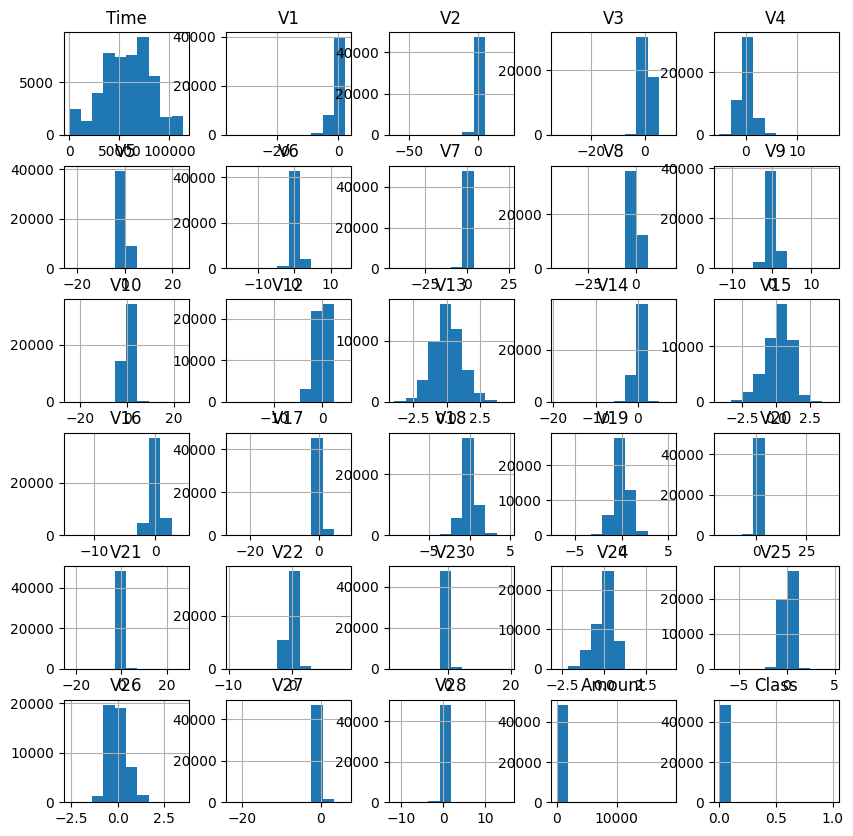

In [ ]:
df.hist(figsize = (10, 10))
plt.show()

<ipython-input-51-a82b4980c6f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


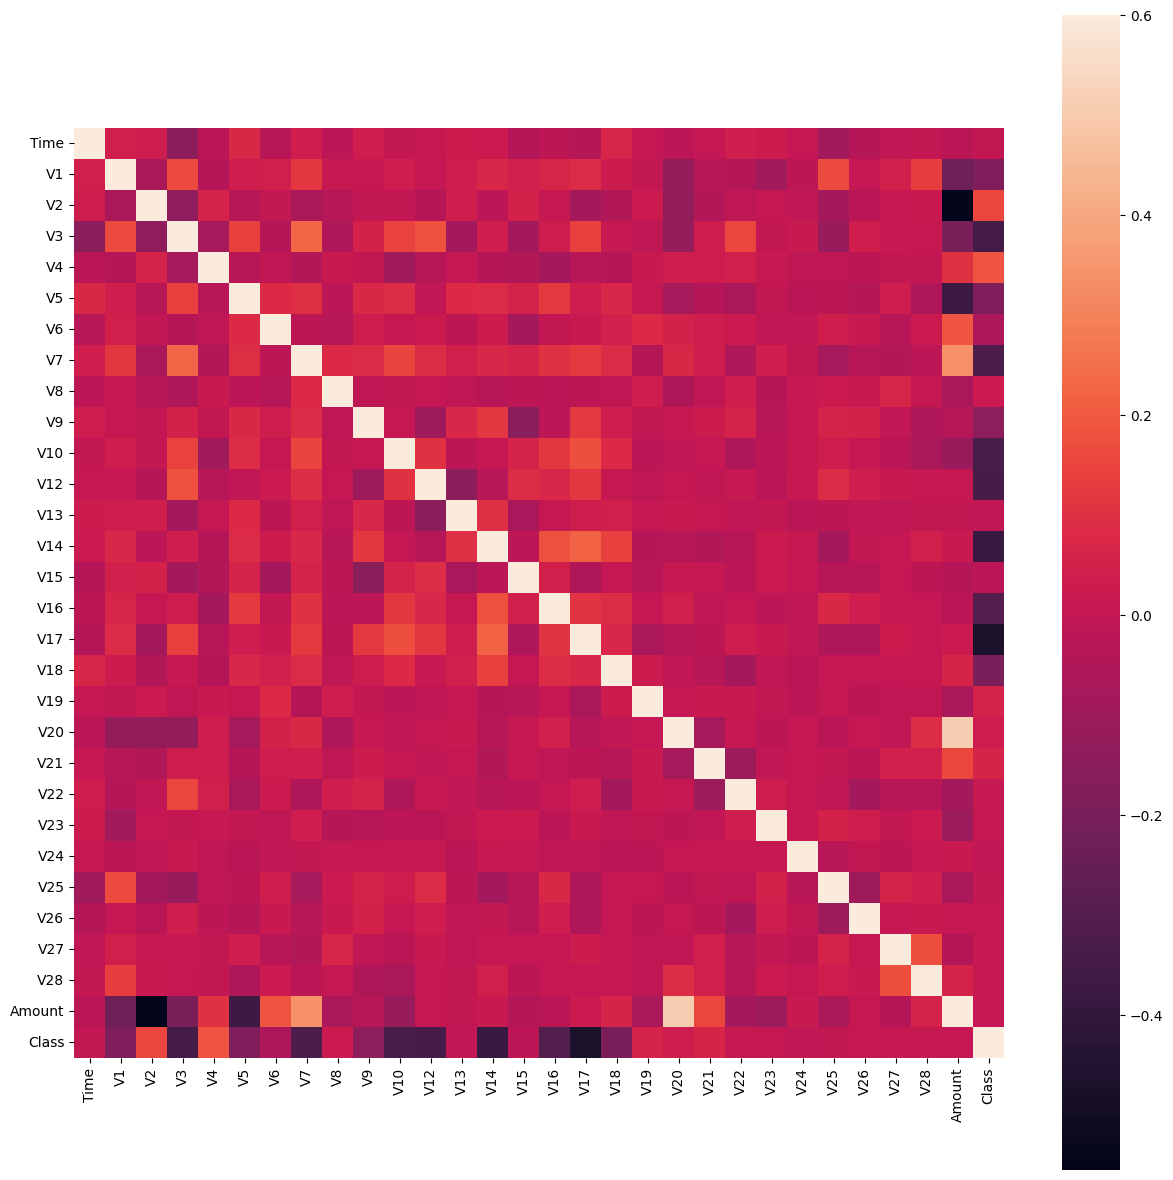

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (15, 15))

#Plotting a heatmap to visualize the correlation matrix and see features
# with strong correlation to the target class
sns.heatmap(corrmat, vmax = .6, square = True) # vmax is the max and min value you want to have for the scale
plt.show()

In [ ]:
corrmat['Class']

Time     -0.000722
V1       -0.181454
V2        0.153496
V3       -0.347454
V4        0.187481
V5       -0.180583
V6       -0.061835
V7       -0.323744
V8        0.020369
V9       -0.140972
V10      -0.331041
V12      -0.334447
V13      -0.007817
V14      -0.382703
V15      -0.019417
V16      -0.303693
V17      -0.471686
V18      -0.196001
V19       0.054469
V20       0.028100
V21       0.061129
V22       0.008954
V23       0.004920
V24      -0.004979
V25      -0.003456
V26       0.003194
V27       0.009339
V28       0.013208
Amount    0.002940
Class     1.000000
Name: Class, dtype: float64

In [ ]:

cols = corrmat.keys()
cols_to_keep = []

for i in range(len(corrmat)):

    if abs(corrmat['Class'][i]) > 0.01:

        cols_to_keep.append(cols[i])

In [ ]:
len(cols_to_keep)

21

In [ ]:
cols_to_keep

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V12',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V28',
 'Class']

In [ ]:
cols = cols_to_keep[:-1]

In [ ]:
features = df[cols] # records of all transactions, excluding the target class
target = df["Class"] # records of the corresponding label for each record

print(features.shape)
print(target.shape)

(48768, 20)
(48768,)


In [ ]:
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "IF": IsolationForest(max_samples = len(features),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "LOF": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)}

In [ ]:
# skipping the train, test split step because we wish the model to overfit on these features and learn
# a mathematical function to map the features

n_outliers = len(Fraud)

# Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the dataframe and tag outliers
    if clf_name == "LOF":

        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_

    else:

        # train/fit classifier on our features
        clf.fit(features)
        # generate predictions
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)

    # Reshape the prediction values to 0 for valid, 1 for fraud.

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != target).sum()

    # Run classification metrics
    print('Classifier {0}: \nNumber of Errors: {1}'.format(clf_name, n_errors))
    print('Accuracy: {0}%\n'.format(accuracy_score(target, y_pred)*100))
    print(classification_report(target, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classifier IF: 
Number of Errors: 115
Accuracy: 99.76418963254594%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48650
         1.0       0.51      0.52      0.51       118

    accuracy                           1.00     48768
   macro avg       0.76      0.76      0.76     48768
weighted avg       1.00      1.00      1.00     48768

Classifier LOF: 
Number of Errors: 237
Accuracy: 99.51402559055119%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48650
         1.0       0.00      0.00      0.00       118

    accuracy                           1.00     48768
   macro avg       0.50      0.50      0.50     48768
weighted avg       1.00      1.00      1.00     48768

